# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для компании. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [ ]:
try:
    data = pd.read_csv('/Users/arina200212yandex.ru/Desktop/gold_recovery_full_new.csv')
    test_data = pd.read_csv('/Users/arina200212yandex.ru/Desktop/gold_recovery_test_new.csv')
    train_data = pd.read_csv('/Users/arina200212yandex.ru/Desktop/gold_recovery_train_new.csv')
    
except:
    data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [ ]:
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
test_data.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [ ]:
data.duplicated().sum()

0

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

В выборке не обнаружено дубликатов. Однако, было обнаружено несколько пропущенных значений в тестовой и обучающей выборках. Кроме того, в обучающей выборке было обнаружено значительно больше столбцов с пропущенными значениями. Возможно, эти пропуски были вызваны неправильным заполнением данных на различных этапах или некоторыми отсутствующими значениями.

#### 1.2 Проверьте, что эффективность обогащения рассчитана правильно. 

In [ ]:
formula = ((train_data['rougher.output.concentrate_au']*(train_data['rougher.input.feed_au']-train_data['rougher.output.tail_au'])) / (train_data['rougher.input.feed_au']*(train_data['rougher.output.concentrate_au']-train_data['rougher.output.tail_au'])))*100


#### Найдите MAE между вашими расчётами и значением признака

In [ ]:
mae = mean_absolute_error(train_data['rougher.output.recovery'],formula)
mae

9.73512347450521e-15

MAE составляет 9. Такая небольшая абсолютная ошибка позволяет сделать вывод, что модель правильно рассчитывает результаты.

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. 

In [ ]:
train_columns = train_data.columns
test_columns = test_data.columns
resalt = train_columns.difference(test_columns)
resalt

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке отсутствуют следующие признаки: final.output, primary_cleaner.output, rougher.output, secondary_cleaner.output. Эти расчетные (calculation) и выходные (output) характеристики процесса недоступны в тестовой выборке, так как их невозможно получить или измерить в процессе выполнения технологического процесса.

#### 1.4. Проведите предобработку данных.

Для начала рекомендуется удалить из обучающей выборки те столбцы, которых нет в тестовой выборке.

In [ ]:
train_data = train_data[test_data.columns]

Ранее в обоих выборках были замечены пропуски, однако количество этих пропусков относительно небольшое в сравнении с общим количеством строк. Поэтому, можно принять решение об удалении этих пропусков из выборок.

In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

### Вывод 

Изучили полученные данные, проверили их на наличие дубликатов и пропусков. Также просмотрели столбцы, которые присутствуют в обучающей выборке, но отсутствуют в тестовой. Был осуществлен расчет эффективности обогащения.

## Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

руды следующие:

1. rougher — этап флотации
2. primary_cleaner — этап первичной очистки
3. final — финальный этап с получением финальных характеристик продукта.

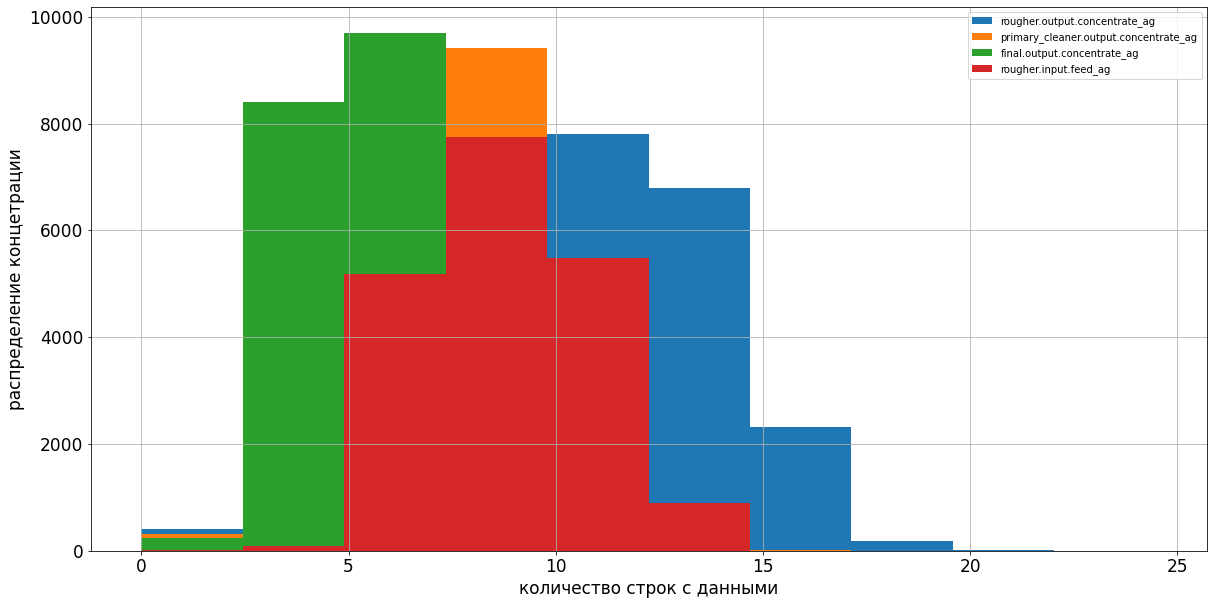

In [ ]:
data.plot(y=['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag','rougher.input.feed_ag'], kind='hist',figsize=(20,10),fontsize=17)
plt.grid(True)
plt.xlabel('количество строк с данными',fontsize=17)
plt.ylabel('распределение концетрации',fontsize=17)
plt.show()



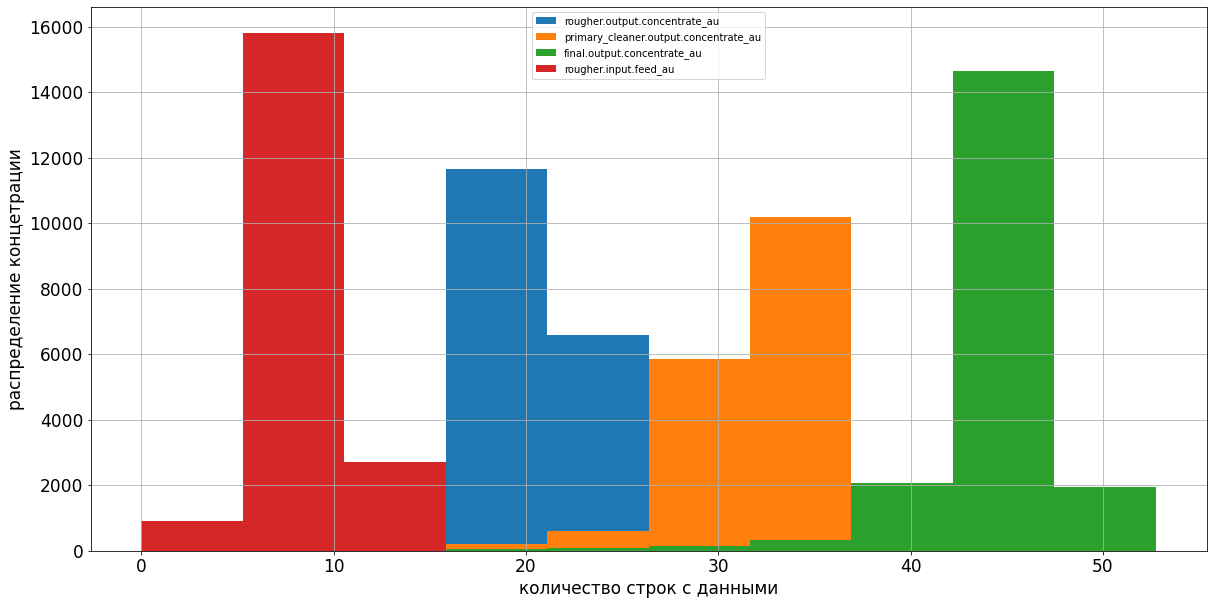

In [ ]:
data.plot(y=['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au','rougher.input.feed_au'], kind='hist',figsize=(20,10),fontsize=17)
plt.grid(True)
plt.xlabel('количество строк с данными',fontsize=17)
plt.ylabel('распределение концетрации',fontsize=17)
plt.show()




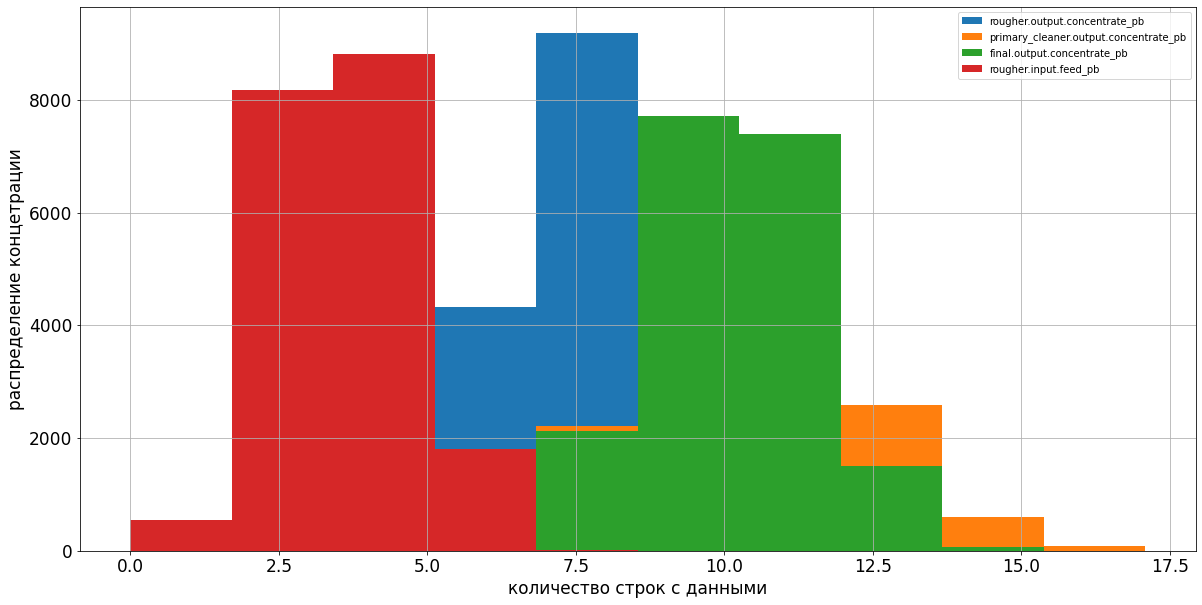

In [ ]:
data.plot(y=['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb','rougher.input.feed_pb'], kind='hist',figsize=(20,10),fontsize=17)
plt.grid(True)
plt.xlabel('количество строк с данными',fontsize=17)
plt.ylabel('распределение концетрации',fontsize=17)
plt.show()




Из графиков видно, что концентрация металлов свинца и серебра на всех этапах примерно одинакова и не сильно меняется. В то же время концентрация золота резко увеличивается именно на финальном этапе.

#### 2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

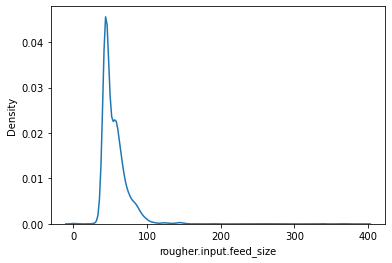

In [ ]:
sns.kdeplot(data=test_data,x = 'rougher.input.feed_size')

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

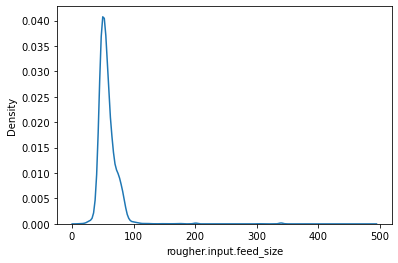

In [ ]:
sns.kdeplot(data=train_data,x = 'rougher.input.feed_size')

По графикам обучающей и тестовой выборки можно сделать вывод о том, что размер гранул практически идентичен в обеих выборках.

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

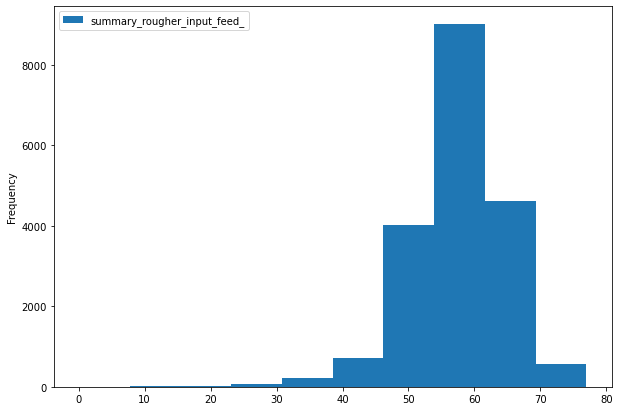

In [ ]:
data['summary_rougher_input_feed_']= data['rougher.input.feed_ag']+data['rougher.input.feed_au']+data['rougher.input.feed_pb']+data['rougher.input.feed_sol']
data.plot(y = 'summary_rougher_input_feed_',kind='hist',figsize=(10,7))
plt.show()

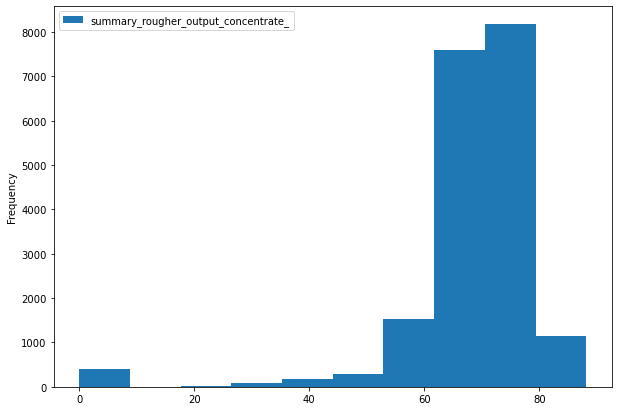

In [ ]:
data['summary_rougher_output_concentrate_']= data['rougher.output.concentrate_ag']+data['rougher.output.concentrate_au']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_sol']
data.plot(y = 'summary_rougher_output_concentrate_',kind='hist',figsize=(10,7))
plt.show()

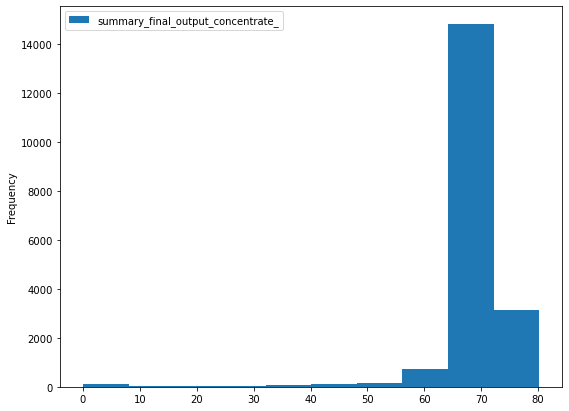

In [ ]:
data['summary_final_output_concentrate_']= data['final.output.concentrate_ag']+data['final.output.concentrate_au']+data['final.output.concentrate_pb']+data['final.output.concentrate_sol']
data.plot(y = 'summary_final_output_concentrate_',kind='hist',figsize=(9,7))
plt.show()

На графике по черновому концентрату видно достаточно большое количество нулевых значений, что не может быть правильной характеристикой. Следовательно, это является аномалией. Для исправления ситуации, необходимо удалить эти значения из данных.

In [ ]:
data['summary_rougher_output_concentrate_']= data['summary_rougher_output_concentrate_'].replace(0, np.nan)
data['summary_rougher_output_concentrate_'].dropna(inplace=True)

### Вывод по разделу 

Концентрация металлов свинца и серебра на всех этапах примерно на одном уровне, но концентрация золота возрастает на финальном этапе. Размер гранул в тестовой и обучающей выборках почти одинаковый. В черновом концентрате была обнаружена аномалия, когда какие-то стадии имели нулевые значения. Эти данные были в дальнейшем удалены.

## Модель

#### 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [ ]:
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
    smape_rough = 1/len(target_rougher) * np.sum(2 * np.abs(
      target_rougher - predicted_rougher) / (np.abs(target_rougher) + np.abs(predicted_rougher))*100)
    smape_fin = 1/len(target_final) * np.sum(2 * np.abs(
      target_final - predicted_final) / (np.abs(target_final) + np.abs(predicted_final))*100)
    return (0.25*smape_rough) + (0.75*smape_fin)

In [ ]:
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

In [ ]:
def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)

#### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Так как столбец с датой не несет в себе полезной информации для моделей, решено удалить его из данных. Для обучения моделей мы будем использовать два алгоритма: Случайный лес и Дерево решений.

In [ ]:
test_data = test_data.merge(data[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'left', on= 'date')
train_data = train_data.merge(data[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'left', on= 'date')



In [ ]:
test_data.drop(['date'],axis = 1 ,inplace=True)
train_data.drop(['date'],axis = 1 ,inplace=True)

Тренировочной выборка.

In [ ]:
features_train_rougher = train_data.filter(regex='^rougher',axis=1)

In [ ]:
features_train_rougher = features_train_rougher.drop(['rougher.output.recovery'], axis=1)

In [ ]:
target_train_rougher = train_data['rougher.output.recovery']

In [ ]:
features_train_final = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [ ]:
target_train_final = train_data['final.output.recovery']

Тестовая выборка.

In [ ]:
features_test_rougher = test_data.filter(regex='^rougher',axis=1)

In [ ]:
features_test_rougher = features_test_rougher.drop(['rougher.output.recovery'], axis=1)

In [ ]:
target_test_rougher = test_data['rougher.output.recovery']

In [ ]:
features_test_final = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [ ]:
target_test_final = test_data['final.output.recovery']

Линейная регрессия.

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_linear = cross_val_score(model, features_train_rougher, target_train_rougher,scoring=scorer, cv=5)
final_linear =  cross_val_score(model, features_train_final, target_train_final,scoring=scorer, cv=5)
print('sMape', smape_final(rougher_linear, final_linear).mean())

sMape -10.872287085156582


Дерево решений.

In [ ]:
for depth in range(1, 10, 1):
    for samples_leaf in range(5,50,5):
        model2 = DecisionTreeRegressor(random_state=12345, max_depth = depth, min_samples_leaf = samples_leaf )
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model2, features_train_rougher, target_train_rougher,scoring=scorer, cv=5)
        final_tree = cross_val_score(model2, features_train_final, target_train_final,scoring=scorer, cv=5)
        print('depth',depth,'min_samples_leaf',samples_leaf)
        print('Итоговое sMAPE для решающего дерева:',smape_final(rougher_tree, final_tree).mean())
print()

depth 1 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 20
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 25
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 30
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 35
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 40
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 1 min_samples_leaf 45
Итоговое sMAPE для решающего дерева: -10.13278756771158
depth 2 min_samples_leaf 5
Итоговое sMAPE для решающего дерева: -10.343740218460521
depth 2 min_samples_leaf 10
Итоговое sMAPE для решающего дерева: -10.343740218460521
depth 2 min_samples_leaf 15
Итоговое sMAPE для решающего дерева: -10.3437402

После применения алгоритма решающего дерева с настроенными параметрами глубины дерева на уровне 4 и минимальным количеством объектов в листьях равным 10, мы получили лучший результат. Итоговое значение sMAPE для данного алгоритма составляет -10.085457987920412.


Случайный лес

In [ ]:
for depth in range(1,10):
    for est in range(5,20,5):
        
        model3 = RandomForestRegressor(max_depth=depth, n_estimators=est,random_state=1234)
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model3, features_train_rougher, target_train_rougher,scoring=scorer, cv=5)
        final_tree = cross_val_score(model3, features_train_final, target_train_final,scoring=scorer, cv=5)
        print('depth',depth,'est',est)
        print('Итоговое sMAPE для решающего дерева:',smape_final(rougher_tree, final_tree).mean())
print()


depth 1 est 5
Итоговое sMAPE для решающего дерева: -10.079184444088295
depth 1 est 10
Итоговое sMAPE для решающего дерева: -9.990453073953699
depth 1 est 15
Итоговое sMAPE для решающего дерева: -10.003779294815235
depth 2 est 5
Итоговое sMAPE для решающего дерева: -9.902541446393673
depth 2 est 10
Итоговое sMAPE для решающего дерева: -9.89114321666068
depth 2 est 15
Итоговое sMAPE для решающего дерева: -9.921076317780262
depth 3 est 5
Итоговое sMAPE для решающего дерева: -9.756089257744131
depth 3 est 10
Итоговое sMAPE для решающего дерева: -9.746247968221084
depth 3 est 15
Итоговое sMAPE для решающего дерева: -9.824149959706004
depth 4 est 5
Итоговое sMAPE для решающего дерева: -9.715131387734392
depth 4 est 10
Итоговое sMAPE для решающего дерева: -9.588508095936206
depth 4 est 15
Итоговое sMAPE для решающего дерева: -9.668993383361201
depth 5 est 5
Итоговое sMAPE для решающего дерева: -9.639648472891206
depth 5 est 10
Итоговое sMAPE для решающего дерева: -9.598209308449526
depth 5 es

По результатам применения алгоритма случайного леса с настроенными параметрами глубины дерева на уровне 5 и количеством деревьев равным 15, получили лучший результат. Итоговое значение sMAPE для данного алгоритма составляет -9.515464685784604.

Проверим значение на тестовой выборке.

In [ ]:
model_01 = RandomForestRegressor(max_depth=5, n_estimators=15,random_state=1234)
model_02 = RandomForestRegressor(max_depth=5, n_estimators=15,random_state=1234)
model_01.fit(features_train_rougher, target_train_rougher)
model_02.fit(features_train_final, target_train_final)
test_predictions_01 = model_01.predict(features_test_rougher)
test_predictions_02 = model_02.predict(features_test_final)
total = smape_total(target_test_rougher, test_predictions_01, target_test_final, test_predictions_02).mean()
print('sMAPE на тестовой выборке:',total)

sMAPE на тестовой выборке: 9.843299784098317


In [ ]:
model_01 = DummyRegressor()
model_02 = DummyRegressor()
model_01.fit(features_train_rougher, target_train_rougher)
model_02.fit(features_train_final, target_train_final)
test_predictions_01 = model_01.predict(features_test_rougher)
test_predictions_02 = model_02.predict(features_test_final)
total = smape_total(target_test_rougher, test_predictions_01, target_test_final, test_predictions_02).mean()
print('sMAPE для DummyRegressor:',total)

sMAPE для DummyRegressor: 9.74478807914118


В проекте на входе были получены данные с несколькими пропущенными значениями, которые в дальнейшем были удалены. При анализе данных были обнаружены следующие характеристики процесса: концентрация металлов свинца и серебра на всех этапах процесса находится примерно на одном уровне, в то время как концентрация золота возрастает на финальном этапе. Размер гранул в тестовой и обучающей выборках практически одинаковый. Была также обнаружена аномалия в черновом концентрате, где какой-то этап процесса имел нулевые значения. Эти данные были удалены из выборки. 

Далее в проекте были применены различные модели (дерево решений, линейная регрессия и случайный лес) и настроены гиперпараметры для каждой модели, чтобы получить наилучшие результаты. Оптимальной моделью оказался случайный лес с оптимальными гиперпараметрами depth=5 и est=15. После проверки этой модели на тестовой выборке, было получено итоговое значение sMAPE = 9.843299784098317.